## The `mne` package


It is possible to build chord diagrams from a connectivity matrix thanks to the neuroscience library [MNE](https://mne.tools/stable/index.html). It comes with a visual function called [plot_connectivity_circle()](https://mne.tools/stable/) that is pretty handy to get good-looking chord diagrams in minutes!

Let's load the library and see what it can make!


In [1]:
from mne.viz import plot_connectivity_circle

# only for the exemple
import numpy as np

## Most basic chord diagram with `mne`


Let's start with a basic examples. 20 nodes that are randomly connected. Two objects are created:

- `node_names` that is a list of 20 node names
- `con` that is an object containing some random links between nodes.

Both object are passed to the `plot_connectivity_circle()` function that automatically builds the chord diagram.


In [2]:
N = 20  # Number of nodes
node_names = [f"N{i}" for i in range(N)]  # List of labels [N]

# Random connectivity
ran = np.random.rand(N, N)
# NaN so it doesn't display the weak links
con = np.where(ran > 0.9, ran, np.nan)

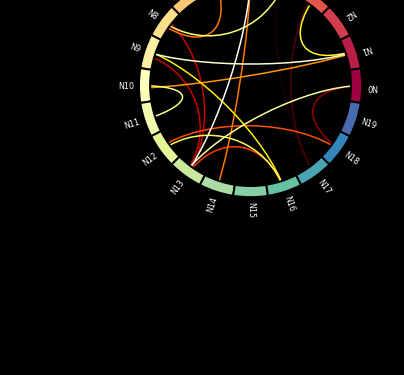

In [3]:
fig, axes = plot_connectivity_circle(con, node_names)

## Split the chord


It is possible to split the chord diagram in several parts. It can be handy to build chord diagrams where nodes are split in 2 groups, like origin and destination for instance.


In [6]:
start, end = 45, 135
first_half = (np.linspace(start, end, len(node_names)//2) +
              90).astype(int)[::+1] % 360
second_half = (np.linspace(start, end, len(node_names)//2) -
               90).astype(int)[::-1] % 360
node_angles = np.array(list(first_half) + list(second_half))

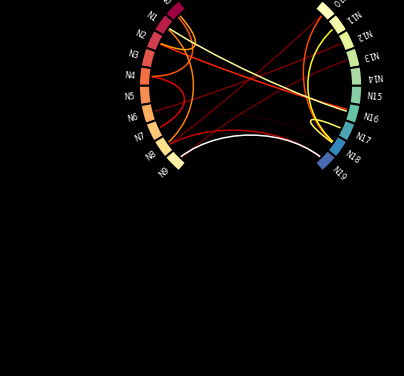

In [7]:
fig, axes = plot_connectivity_circle(con, node_names,
                                     node_angles=node_angles)

## Style: node customization


Pretty much all parts of the chord diagram can be customized. Let's start by changing the node width (with `node_width`) and filtering the links that are shown (with `vmin` and `vmax`)


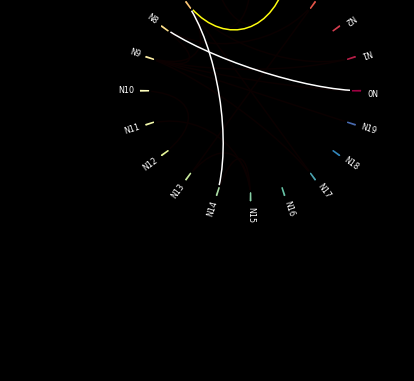

In [6]:
fig, axes = plot_connectivity_circle(con, node_names,
                                     node_width=2, vmin=0.97, vmax=0.98)

Now let's customize the nodes a bit more:

- `node_colors` for the fill color
- `node_edgecolor` for the edges
- `node_linewidth` for the width


In [202]:
node_edgecolor = N//2 * [(0, 0, 0, 0.)] + N//2 * ['green']
node_colors = N//2 * ['crimson'] + N//2 * [(0, 0, 0, 0.)]

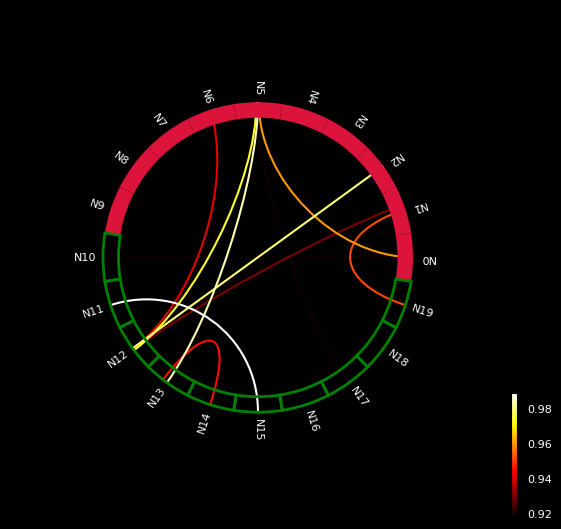

In [233]:
fig, axes = plot_connectivity_circle(con, node_names,
                                     node_colors=node_colors, node_edgecolor=node_edgecolor, node_linewidth=2)

## Style: labels and links


Now some customization for labels, links and background:

- `colormap`
- `facecolor`
- `textcolor`
- `colorbar`
- `linewidth`


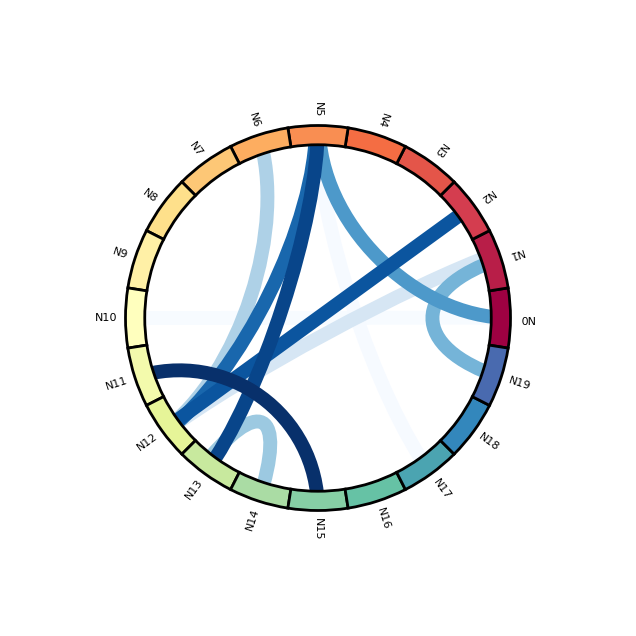

In [228]:
fig, axes = plot_connectivity_circle(con, node_names,
                                     colormap='Blues', facecolor='white', textcolor='black', colorbar=False,
                                     linewidth=10)

## Brocoli


Let's get some fun and build a data art brocoli like chord diagram 😊 !


In [296]:
N = 200
node_names = N * ['']
ran = np.random.rand(N, N)
con = np.where(ran > 0.95, ran, np.nan)
first_half = (np.linspace(0, 180, len(node_names)//2)).astype(int)[::+1] % 360
second_half = (np.linspace(70, 110, len(node_names)//2) -
               180).astype(int)[::-1] % 360
node_angles = np.array(list(first_half) + list(second_half))
node_colors = node_edgecolor = N * ['green']

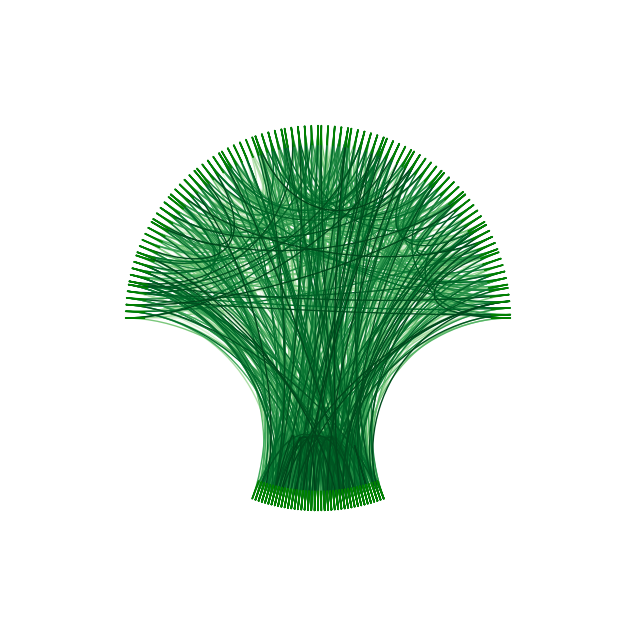

In [297]:
fig, axes = plot_connectivity_circle(con, node_names,
                                     node_angles=node_angles,
                                     colormap='Greens', facecolor='w', textcolor='k', colorbar=False,
                                     node_colors=node_colors, node_edgecolor=node_edgecolor,
                                     node_width=0.1, node_linewidth=1, linewidth=1)